<a href="https://colab.research.google.com/github/Felipekcomt/TP-Complejidad/blob/main/TP-COMPLEJIDAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [200]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git
import pandas as pd
import numpy as np
import networkx as nx
import math
import heapq as pq 
from algorithmic_complexity.aclib import graphstuff as gs
URL = 'https://raw.githubusercontent.com/lmcanavals/algorithmic_complexity/main/data/poblaciones.csv'
poblaciones = pd.read_csv(URL)
print(poblaciones)

fatal: destination path 'algorithmic_complexity' already exists and is not an empty directory.
     DEPARTAMENTO         PROVINCIA     DISTRITO  ...    LONGITUD NMI1  NMI2
0        AMAZONAS             BAGUA     ARAMANGO  ...   -78.45299  311  1206
1        AMAZONAS             BAGUA     ARAMANGO  ...  -78.444372   44   129
2        AMAZONAS             BAGUA     ARAMANGO  ...   -78.44472   49   179
3        AMAZONAS             BAGUA        BAGUA  ...  -78.495229    3     8
4        AMAZONAS           BONGARA      CUISPES  ...  -77.965302    1     4
...           ...               ...          ...  ...         ...  ...   ...
3752      UCAYALI  CORONEL PORTILLO  YARINACOCHA  ...  -74.621338   54   186
3753      UCAYALI        PADRE ABAD     CURIMANA  ...   -75.08788  119   483
3754      UCAYALI        PADRE ABAD     CURIMANA  ...  -75.082978    9    43
3755      UCAYALI        PADRE ABAD     CURIMANA  ...  -75.089698   29   132
3756      UCAYALI        PADRE ABAD     CURIMANA  ...  -75

In [202]:
nomprovincias = poblaciones['PROVINCIA'].unique()
print(nomprovincias)

['BAGUA' 'BONGARA' 'CHACHAPOYAS' 'UTCUBAMBA' 'ANTONIO RAYMONDI'
 'BOLOGNESI' 'CARHUAZ' 'CASMA' 'HUARAZ' 'HUARI' 'HUAYLAS' 'OCROS'
 'POMABAMBA' 'RECUAY' 'SANTA' 'SIHUAS' 'YUNGAY' 'ABANCAY' 'ANDAHUAYLAS'
 'ANTABAMBA' 'AYMARAES' 'CHINCHEROS' 'GRAU' 'AREQUIPA' 'CAMANA' 'CARAVELI'
 'CASTILLA' 'CAYLLOMA' 'CONDESUYOS' 'CANGALLO' 'HUAMANGA' 'HUANCA SANCOS'
 'HUANTA' 'LUCANAS' 'PARINACOCHAS' 'VICTOR FAJARDO' 'CAJABAMBA'
 'CAJAMARCA' 'CELENDIN' 'CHOTA' 'CONTUMAZA' 'CUTERVO' 'JAEN' 'SAN IGNACIO'
 'SAN MARCOS' 'SAN MIGUEL' 'SAN MIMGUEL' 'SANTA CRUZ' 'ACOMAYO' 'CALCA'
 'CANAS' 'CANCHIS' 'CHUMBIVILCAS' 'LA CONVENCION' 'PARURO' 'QUISPICANCHI'
 'PROVINCIA' 'CASTROVIRREYNA' 'CHURCAMPA' 'HUANCAVELICA' 'HUAYTARA'
 'TAYACAJA' 'AMBO' 'DOS DE MAYO' 'DOSDEMAYO' 'HUAMALIES' 'HUANUCO SANTA'
 'HUANUCO' 'LAURICOCHA' 'LEONCIO PRADO' 'MARAÑON' 'PUERTO INCA' 'CHINCHA'
 'ICA' 'NASCA' 'PALPA' 'PISCO' 'CHANCHAMAYO' 'CHUPACA' 'CONCEPCION'
 'HUANCAYO' 'JAUJA' 'JUNIN' 'SATIPO' 'TARMA' 'ASCOPE' 'BOLIVAR' 'CHEPEN'
 'GRAN C

In [ ]:
provincias = dict()
for nom in nomprovincias:
    provincias[nom] = poblaciones[poblaciones['PROVINCIA'] == nom]
    print(nom, len(provincias[nom]))

In [204]:
Provin = 'LORETO'
nomdistritos = provincias[Provin]['DISTRITO'].unique()
print(nomdistritos)
distritos = dict()
for nom in nomdistritos:
    distritos[nom] = provincias[Provin][provincias[Provin]['DISTRITO'] == nom]
    print(nom, len(distritos[nom]))

['NAUTA' 'PARINARI' 'URARINAS']
NAUTA 10
PARINARI 7
URARINAS 6


In [205]:
distrito = distritos['URARINAS']
print(distrito)

     DEPARTAMENTO PROVINCIA  DISTRITO  ...    LONGITUD NMI1 NMI2
2537       LORETO    LORETO  URARINAS  ...   -74.78762    6   16
2538       LORETO    LORETO  URARINAS  ...  -74.874723    3   17
2539       LORETO    LORETO  URARINAS  ...  -74.839652   34  144
2540       LORETO    LORETO  URARINAS  ...   -75.20256   35  137
2541       LORETO    LORETO  URARINAS  ...  -74.933766  208  810
2542       LORETO    LORETO  URARINAS  ...  -74.914747   75  347

[6 rows x 8 columns]


In [206]:
def haversine(cp1, cp2): #FORMULAR PARA HALLAR DISTANCIA ENTRE 2 PUNTOS GEOFRAFICOS (LATITUD, LONGITUD)
  la1, lo1 = float(cp1['LATITUD']), float(cp1['LONGITUD'])
  la2, lo2 = float(cp2['LATITUD']), float(cp2['LONGITUD'])
  lo1, la1, lo2, la2 = map(math.radians, [lo1, la1, lo2, la2])
  dlo = lo2 - lo1 #Diferencia de longitud
  dla = la2 - la1 #Diferencia de latitud
  a = math.sin(dla/2)**2 + math.cos(la1) * math.cos(la2) * math.sin(dlo/2)**2
  c = 2 * math.asin(math.sqrt(a))
  r = 6371 #radio de la tierra (equivolumen)

  return round(c * r, 2)

In [271]:
G = nx.Graph()
aristas = 0
dist = []
goto = []
adj = [[],[],[],[],[],[]]
Nstart = 0
col = 'CENTRO POBLADO'
for i, cp1 in distrito.iterrows():
  G.add_node(i, label=cp1[col])
for i, cp1 in distrito.iterrows():
  Nend = 0
  Nstart = Nstart + 1
  for j, cp2 in distrito.iterrows():
    Nend = Nend + 1
    if cp1[col] != cp2[col]:
      aristas = aristas + 1
      G.add_edge(i, j, weight=haversine(cp1, cp2))
      goto.append((cp1[col], cp2[col],haversine(cp1, cp2)))
      n = len(G)    
      m = aristas//2
      adj[Nstart - 1].append((Nend - 1, haversine(cp1, cp2)))
     # dist = adj[Nend - 1][0]
  print(Nstart - 1,"->" ,adj[Nstart - 1])
 # print(dist)



0 -> [(1, 10.56), (2, 6.0), (3, 49.57), (4, 17.25), (5, 16.19)]
1 -> [(0, 10.56), (2, 4.69), (3, 39.02), (4, 6.75), (5, 5.77)]
2 -> [(0, 6.0), (1, 4.69), (3, 43.61), (4, 11.28), (5, 10.45)]
3 -> [(0, 49.57), (1, 39.02), (2, 43.61), (4, 32.33), (5, 33.59)]
4 -> [(0, 17.25), (1, 6.75), (2, 11.28), (3, 32.33), (5, 2.93)]
5 -> [(0, 16.19), (1, 5.77), (2, 10.45), (3, 33.59), (4, 2.93)]


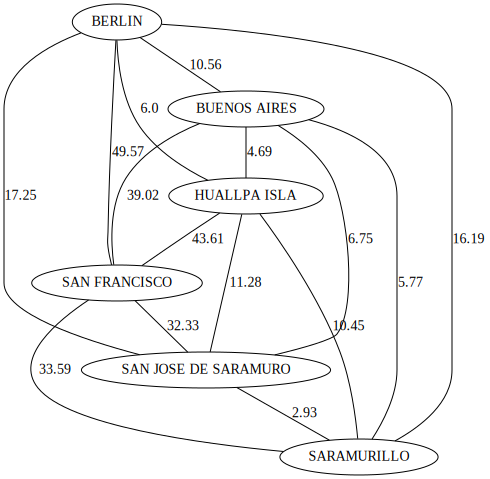

In [208]:
gs.nx2gv(G, weighted = True, params = {'size' : '15'},nodeinfo=True)

In [275]:

def dijkstra(n,adj ,start):
  q = [] 
  visit = [False for _ in range(n)]
  dist = [float('inf') for _ in range(n)]
  dist[start] = 0
  pq.heappush(q,(0 ,start))
  while len(q) > 0:
    _, v = pq.heappop(q) #(v = 0, w= 0), (v=1, w= 10.56) 
    if visit[v]:
      continue
    visit[v] = True 
    for vecino, w in adj[v]: # 0 -> [(1, 10.56), (2, 6.0), (3, 49.57), (4, 17.25), (5, 16.19)]
      if dist[v] + w < dist[vecino] and visit[vecino] == False: #vecino = 1 , w = 10.56
        dist[vecino] = dist[v] + w #dist[vecino] = 10.56
        pq.heappush(q, (dist[vecino], vecino))      
  return dist
  print(dist)
ans = dijkstra(n, adj, 0)
for x in ans:
  print(x, end =' -> ')

0 -> 10.56 -> 6.0 -> 49.57 -> 17.25 -> 16.19 -> 